# Progress Report #3: [Blog-Sentiment Analysis](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis)

To learn more about the data and see my previous analysis, refer to [Progress Report #2](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis/blob/master/progress_report_part2.ipynb).

# Loading the data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
%pprint

Pretty printing has been turned OFF


In [2]:
dir = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/'

In [3]:
blogdata = pd.read_csv(dir + 'data/blogtext.csv')

In [4]:
newcolumns = ['id', 'gender', 'age', 'industry', 'sign', 'date', 'text']
blogdata.columns = newcolumns
blogdata.head(3)

,id,gender,age,industry,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


# Data analysis
### Goals of my analysis
There are three things I would like to investigate in this data. 
1. Word frequencies
2. Blog topics
3. Blog sentiment

I already looked at [word frequencies](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis/blob/master/progress_report_part2.ipynb) in Progress Report #2, though I'm not super happy with my results. I also experimented with [topic clustering using LDA (Latent Dirichlet Allocation) and scikit-learn](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis/blob/master/progress_report_part2.ipynb). 

For Progress Report #3, I am going to begin by exploring blog sentiment. If I have time, I will revisit the previous two goals of my analysis.

## Sentiment analysis

Ok so, it appears the vast majority of sentiment analysis groups texts into "positive" and "negative". I would really like to go deeper than that if possible, but I'll try positive and negative classification first.

Since I am really not interested in labeling even a portion of the 681,284 blogs in this dataset for sentiment, I think I am going to try using some already trained models or wordlists with sentiment mapping. Many sentiment models were trained on traditional corpus data, using text from news and books. These models don't incorporate things like emoticons :-) and other internet-specific language which would be found in the blog dataset. In order to get the best sentiment judgments, I specifically looked for models trained on more modern corpora.

### First try: VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is "a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media". It is also part of NLTK, which is convenient. It looks like it can be used on a whole text without tokenization.
Credit:
> Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
sia = SentimentIntensityAnalyzer()

In [7]:
print(blogdata.text[30000])
text = blogdata.text[30000]

       well another days gone past and a major highlight of today has been two mass nose bleeds, while the blood is an itresting liquid its rather annoting when its streaning from your nose instead of someones neck. also today was the first full veiwing of the transit of venus across the sun whitnessed by mankind so though it may have been a pathetic black dot moving across the sun it was a once in a life time event and I'm slighty happyer that i've seen what some people can never see.  well with two nosebleeds, a mathes exam, a good roasting at the hands of the sun, an inability to focus properly and a ponding headache coming on I'm not feeling particly good tonight. but i've found my way back into hack this site which is a cool website which basicly gives the basics to the advanced on web hacking if your intrested its  urlLink hack-this-site dot org  aI'm quite happy with myself as im now twice as far as i got last time and i read loads of help articals then  well i dont feel like ty

After doing some poking around I am going to try this blog - it seems pretty negative, but it also uses a lot of sarcasm and understatement, as well as mispellings, which might be an issue. And though it does focus on the negative it also mentions some happier things. Let's see how VADER classifies this.

In [8]:
sia.polarity_scores(text)

{'neg': 0.052, 'neu': 0.798, 'pos': 0.149, 'compound': 0.9709}

VADER ranks sentiment using a score between -1 and 1. Greater than 0.5 is positive, less than -0.5 is negative, and anything in between is neutral. `.polarity_scores` returns the percentage of the text considered negative, percentage considered neutral, percentage considered positive, and lastly the overall score for the document (`compound`). VADER did a not super great job, since it returned a very very positive score for a negative-seeming document, as well as categorizing most of the statements as "neutral". I considered this to be a pretty emotionally charged blog. Let's keep exploring VADER anyway and see how it does.

In [9]:
blogdata.text[412412]

"           I am pondering the idea of attempting to learn XML again, to make the site a bit more consistiant, in terms of tags, text sizes, and styles... Fear-not, it wont cut into the time I spen Dev'ing, just improve the work I do :)         "

In [10]:
sia.polarity_scores(blogdata.text[412412])

{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.7727}

This statement seems pretty darn neutral to me, though there is a smiley face. The classifier seems to lean positive.

In [11]:
# let's try a longer text
blogdata.text[300000]

'       Wat my feeling toward Sheffield??? Cold, cool and a bit of disappointment.   Cold – although now is summer, but the weather was quite cold especially the 1st day. It was a gloomy day and rain late of the day. The temperature was below 10 degree Celsius. Then the other days was like the weather in Genting Highlands and sometime even cooler then Genting… but I quite like the weather here, u can walk for hours with out any sweat in the afternoon. Believe it or not….  Cool – the cars, building, scenery and bla blab la were cool. After a few days here, I can see all my dream cars, Ferrari, Lambogini, Lotus, GTO, FTO, Impreza, BMW (the model tat drove by James Bond) and many many more tat I dunno the name. however, there is proton here also. Oh ya, kancil also got. Taken photo somemore… hahaha : p  oh.. bout the building, most of the building may seem a bit old, but inside the building was very nice and class leh…. E.g. Sheffield Hallam Uni… : )  Disappointment – cant get into the ap

In [12]:
sia.polarity_scores(blogdata.text[300000])

{'neg': 0.057, 'neu': 0.84, 'pos': 0.103, 'compound': 0.9921}

It seems to work pretty good on longer texts. I guess this text is positive overall? It's hard to tell. 

### Running VADER on 10k blog sample

I want to explore some ways to extract information from sentiment analysis. I'm going to do this on a smaller sample of the data before trying them out on the whole dataset.

In [13]:
sample = blogdata.sample(10000)

In [14]:
sample.head(3)

,id,gender,age,industry,sign,date,text
222045,3806796,male,27,Arts,Pisces,"30,June,2004",Dave can you not use the Afterburners b...
572114,3843153,female,24,indUnk,Aries,"06,July,2004",Hey Everyone - am off to Darwin in afew...
422121,1317513,male,17,Arts,Scorpio,"29,February,2004",I've got a freaking plunger around my n...


In [15]:
sample.index[0]

222045

In [16]:
# I've reloaded a couple times now, so I changed the actual first index number to sample.index[0] 
score = sia.polarity_scores(sample['text'][sample.index[0]])

In [17]:
score

{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.9478}

In [18]:
score['compound']

0.9478

In [19]:
def summarize_sentiment(df):
    all_scores = []
    for x in df.index:
        score = sia.polarity_scores(df['text'][x])
        if score['compound'] >= 0.5:
            all_scores.append('positive')
        elif score['compound'] <= -0.5:
            all_scores.append('negative')
        else:
            all_scores.append('neutral')
    return all_scores

In [20]:
sample['sentiment'] = summarize_sentiment(sample)

In [21]:
sample.head(10)

,id,gender,age,industry,sign,date,text,sentiment
222045,3806796,male,27,Arts,Pisces,"30,June,2004",Dave can you not use the Afterburners b...,positive
572114,3843153,female,24,indUnk,Aries,"06,July,2004",Hey Everyone - am off to Darwin in afew...,positive
422121,1317513,male,17,Arts,Scorpio,"29,February,2004",I've got a freaking plunger around my n...,positive
537733,3607084,female,16,Arts,Virgo,"11,June,2004",urlLink BdC.crew&nbsp; urlLink ...,neutral
187169,2324198,male,24,indUnk,Scorpio,"03,June,2004","Have ordered my car today, well hav...",positive
527378,3425171,female,41,Non-Profit,Aquarius,"30,June,2004",They keep saying rain - then we get no rain...,negative
389470,619488,female,25,indUnk,Cancer,"23,May,2003",so i haven't updated much lately. i've...,negative
532406,271835,male,24,Technology,Libra,"15,July,2004",Hope you dont have anything to do cos ...,positive
102139,3226138,female,34,indUnk,Sagittarius,"03,May,2004",It took awhile for me to look...,positive
135107,1057539,female,33,Telecommunications,Pisces,"09,December,2003",Before I get into all of the lous...,negative


That worked! Let's see what the sentiments look like.

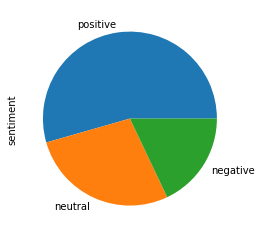

In [22]:
sample.sentiment.value_counts().plot(kind="pie")

In [23]:
from collections import Counter

In [24]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
sample['tokens'] = sample.text.map(tokenizer.tokenize)

In [25]:
# stealing my own code from before
def Top10CategoryWords(df, column):
    """
    Find top 10 words for each category in a column and plot.
    """
    ax_count = 0
    fig, axes = plt.subplots(len(set(df[column].values)), 1)
    for category in set(df[column].values):
        cnt = Counter()
        for blog in df[df[column]==category].tokens:
            cnt.update(blog)
        pd.DataFrame(cnt.most_common(10)).set_index(0).plot(kind='bar', 
                                                            figsize=(6,6*len(set(df[column].values))), 
                                                            ax=axes[ax_count], 
                                                            title='Top 10 most frequent words for ' + category)
        ax_count += 1

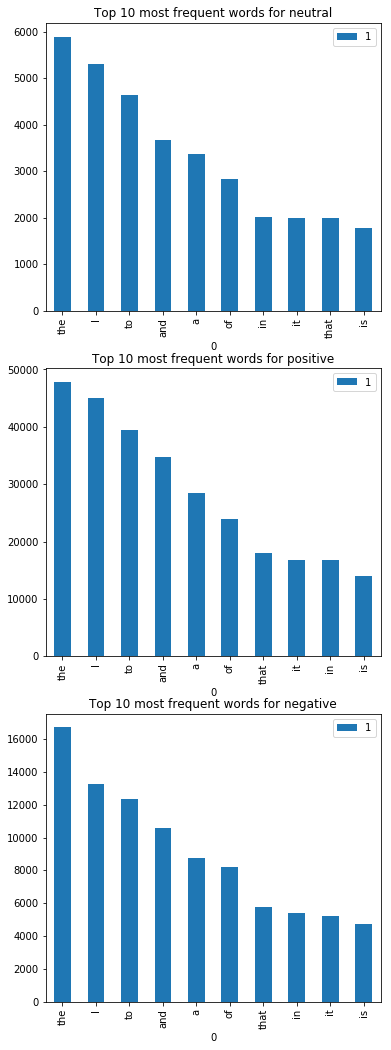

In [26]:
Top10CategoryWords(sample, 'sentiment')

I always forget to remove stopwords. I would also like to remove 'urlLink' and 'nbsp' (non-breaking space, I think?). 

In [27]:
from nltk.corpus import stopwords
def remove_stuff(toks):
    """
    Lowercases tokens and removes stopwords. Also removes 'urlLink' and 'nbsp'.
    """
    lowered = [w.lower() for w in toks]
    stuff = stopwords.words('english')
    stuff.extend(['urllink','nbsp'])
    no_stuff = [w for w in lowered if not w in stuff]
    return no_stuff

In [28]:
sample['tokens'] = sample.tokens.map(remove_stuff)

In [29]:
sample.head(3)

,id,gender,age,industry,sign,date,text,sentiment,tokens
222045,3806796,male,27,Arts,Pisces,"30,June,2004",Dave can you not use the Afterburners b...,positive,"[dave, use, afterburners, blog, business, good..."
572114,3843153,female,24,indUnk,Aries,"06,July,2004",Hey Everyone - am off to Darwin in afew...,positive,"[hey, everyone, darwin, afew, hours, fun, pun,..."
422121,1317513,male,17,Arts,Scorpio,"29,February,2004",I've got a freaking plunger around my n...,positive,"[got, freaking, plunger, around, neck, yay, to..."


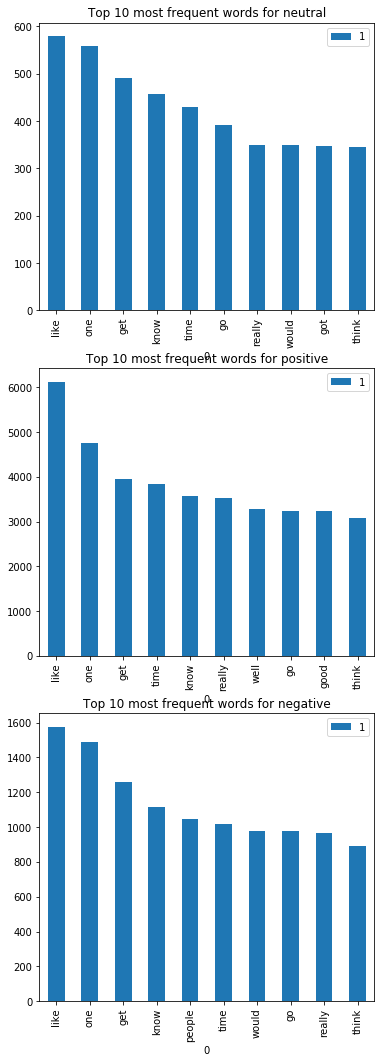

In [30]:
Top10CategoryWords(sample, 'sentiment')

These are all very similar... did I do something wrong? Is VADER just not good for my data? Idk.

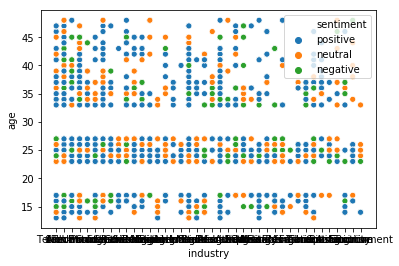

In [31]:
ax = sns.scatterplot(x="industry", y="age",
                     hue="sentiment", data=sample)

This isn't informative but like... it kinda looks cool.......

In [32]:
# i should've done this before but whatever
def polarity_score(df):
    """
    Returns list of polarity scores for a column of text in a dataframe.
    """
    pol_scores = []
    for x in df.index:
        score = sia.polarity_scores(df['text'][x])
        pol_scores.append(score)
    return pol_scores

In [33]:
sample['polarity_score'] = polarity_score(sample)

In [34]:
sample.polarity_score[sample.index[0]]['compound']

0.9478

### Running VADER on all the blogs
I was looking into some sentiment lexicons, specifically the [NRC Word-Emotion Association Lexicon](http://www.saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), and it looks very rad, but I think I'm just going to stick with VADER because building my own model is intimidating. My next steps will be to run VADER on all the blogs, save the dataframe with the polarity information, and then do some stats stuff with it in R.

In [35]:
blogdata['sentiment'] = summarize_sentiment(blogdata)

In [36]:
# the smart thing to do would be to fix my error from before and do this in one step instead of two
# but i am not smart
blogdata['tokens'] = blogdata.text.map(tokenizer.tokenize)

In [ ]:
blogdata['tokens'] = blogdata.tokens.map(remove_stuff)

I'm going to edit my polarity score function, because I really just want the `compound` score, and it's a pain to have a dictionary within a dataframe.

In [ ]:
def polarity_score(df):
    """
    Returns list of compound polarity scores for a column of text in a dataframe.
    """
    pol_scores = []
    for x in df.index:
        score = sia.polarity_scores(df['text'][x])
        pol_scores.append(score['compound'])
    return pol_scores

In [ ]:
blogdata['polarity_score'] = polarity_score(blogdata)

That took so long :'( I also tried installing something to my computer while this was running and the fan has literally never sounded so angry. 